<a href="https://colab.research.google.com/github/mak4x13/Machine-Learning/blob/main/Hitters_Prediction_using_LassoReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Hitters.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [ ]:
df['Salary'].fillna(df['Salary'].median(skipna=True), inplace=True)
df.isna().sum()

,0
Unnamed: 0,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0


<Axes: ylabel='NewLeague'>

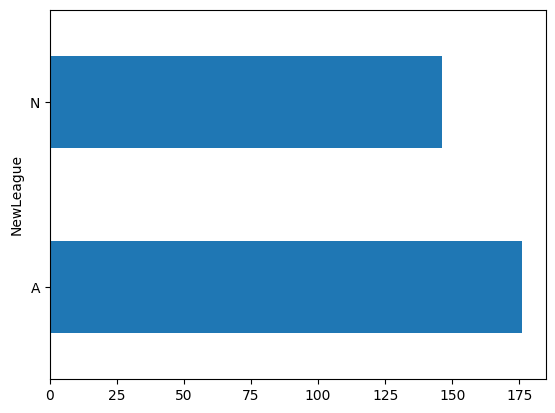

In [ ]:
# df['NewLeague'].value_counts().plot.barh()
# df['League'].value_counts().plot.barh()
# df[''Division].value_counts().plot.barh()
# They all have two categories so we are converting them into single one

In [ ]:
dms = pd.get_dummies(df[['League', 'NewLeague', 'Division']], drop_first=True)

In [ ]:
y = df['Salary']
x_ = df.drop(['Unnamed: 0', 'Division', 'Salary', 'League', 'NewLeague'], axis=1)
X = pd.concat([x_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1).astype('float64')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
lr = Lasso()
model = lr.fit(X_train, y_train)
model.intercept_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.923e+06, tolerance: 3.853e+03
  model = cd_fast.enet_coordinate_descent(


342.8733925858769

In [ ]:
model.coef_
# It made some coefficients = 0

array([-1.98558949e+00,  5.50494749e+00,  4.79612807e+00,  1.02123896e-01,
       -8.11521080e-01,  4.87004116e+00, -9.97808288e+00, -2.19391227e-01,
        6.16237616e-01,  9.03214960e-03,  8.73990383e-01,  7.84172593e-01,
       -8.13423037e-01,  1.83989460e-01,  4.04846687e-01, -4.08650952e+00,
        2.67092023e+01, -1.11463261e+02, -0.00000000e+00])

In [ ]:
y_pred = model.predict(X_test)
print("R2 score: ", r2_score(y_test, y_pred))
print("RSME: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.3657513009571691
RSME:  345.6190692407428


In [ ]:
# Tuning the hyperparameters to find best alpha/penalty value
lasso_cv = LassoCV(alphas = np.random.randint(0, 1000, 100), cv=10, max_iter=10000, n_jobs=-1).fit(X_train, y_train)
lasso_cv.alpha_


13

In [ ]:
lasso_tuned = Lasso().set_params(alpha=13).fit(X_train, y_train)
y_pred2 = lasso_tuned.predict(X_test)
print("R2 score: ", r2_score(y_test, y_pred2))
print("RSME: ", np.sqrt(mean_squared_error(y_test, y_pred2)))

R2 score:  0.36250978777839105
RSME:  346.50113724805675


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.778e+06, tolerance: 3.853e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso_tuned.coef_

array([ -1.92562929,   5.14020174,   2.50214093,   0.28982709,
        -0.        ,   4.82570033,  -4.41663022,  -0.25955104,
         0.72758963,   0.1353273 ,   0.8602446 ,   0.7313746 ,
        -0.78890368,   0.17900707,   0.38387235,  -2.71245175,
         0.        , -59.87155254,   0.        ])